# Dimensionality Reduction using PCA (Principal Component Analysis) on Iris Dataset 🌸



### 🏢 Business Problem Context

A flower classification system records 4 features per flower: sepal length, sepal width, petal length, petal width.

These features are somewhat correlated (e.g., longer petals often mean longer sepals).

To visualize data better and speed up classification models, we want to reduce dimensions while keeping most of the important information.

PCA helps us find the smallest number of new features (principal components) that explain the majority of the variance in the flower dataset.

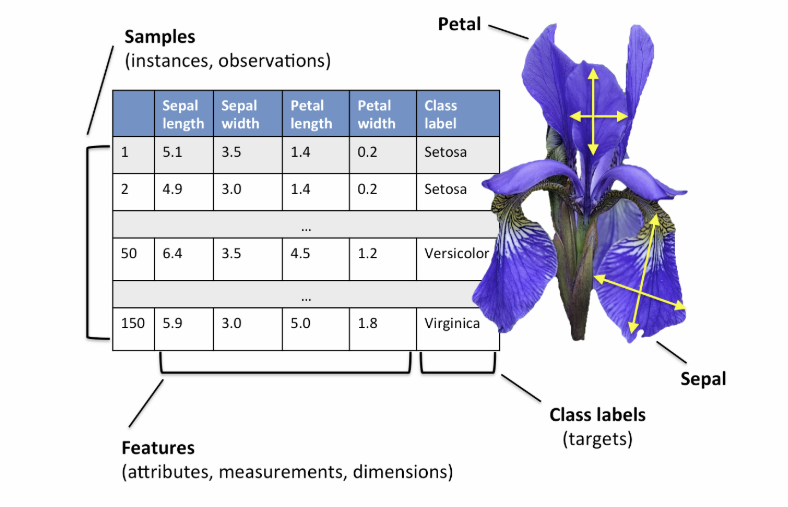

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler


In [3]:

# Load dataset (Iris dataset: 150 flowers, 3 species, 4 features)
iris = load_iris()
X = iris.data   # Features: sepal length, sepal width, petal length, petal width
y = iris.target # Target: species of iris (setosa, versicolor, virginica)

target_names = iris.target_names 
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y[:5]

array([0, 0, 0, 0, 0])

In [7]:
X_scaled = StandardScaler().fit_transform(X)

# Standardize features (mean=0, variance=1)

# Why? PCA is affected by scale.
# Features with larger values dominate if not standardized.

X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [9]:
pca = PCA(n_components=4)

X_pca = pca.fit_transform(X_scaled)  # transform original features into principal components

# Apply PCA (ask for 4 components because original data has 4 features)

# PCA will re-express data in terms of new uncorrelated components
X_pca[:5]

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356, -0.23460885, -0.10300677],
       [-2.36422905, -0.34190802,  0.04420148, -0.02837705],
       [-2.29938422, -0.59739451,  0.09129011,  0.06595556],
       [-2.38984217,  0.64683538,  0.0157382 ,  0.03592281]])

In [10]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Explained variance ratio = how much information (variance) each component captures
# Example: [0.73, 0.23, 0.04, 0.01] → PC1 captures 73%, PC2 23%, etc.


Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


In [11]:
print("Cumulative variance explained:", np.cumsum(pca.explained_variance_ratio_))

# Cumulative variance explained = running total → helps decide how many components to keep


Cumulative variance explained: [0.72962445 0.95813207 0.99482129 1.        ]


### Observation

Example: First 2 components may capture ~95% variance → can reduce from 4D → 2D

### Scree Plot = line plot of cumulative explained variance vs number of components

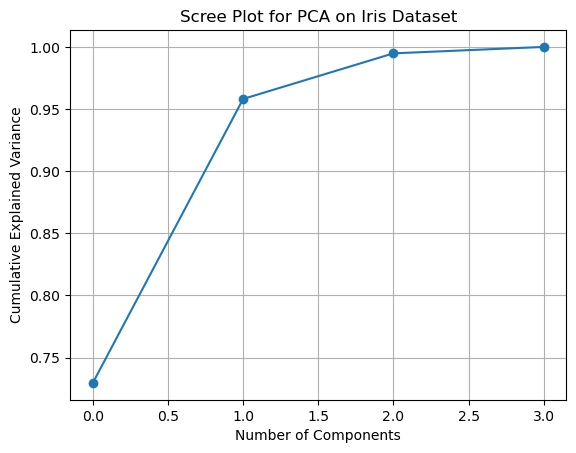

In [13]:
# Why? To visualize the "elbow point" where adding more components gives little extra benefit
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")

plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

plt.title("Scree Plot for PCA on Iris Dataset")
plt.grid(True)
plt.show()


### Observation

The first component is by far the most important, capturing most of the variation in the flowers' features.

Notice how the line bends sharply after the second component? 

This 'elbow' is our key signal. It tells us that we can effectively stop at two components. 

These two components successfully compress our four original measurements without losing what's truly important to distinguish the flowers.

While a third component gets us to 100% variance, it's often overkill. 

The law of diminishing returns is evident here. 

The gain from the third component is so small that for the purpose of simplification and visualization, we can confidently ignore it. 

This is the power of PCA—it helps us identify and focus on the most meaningful patterns in our data.


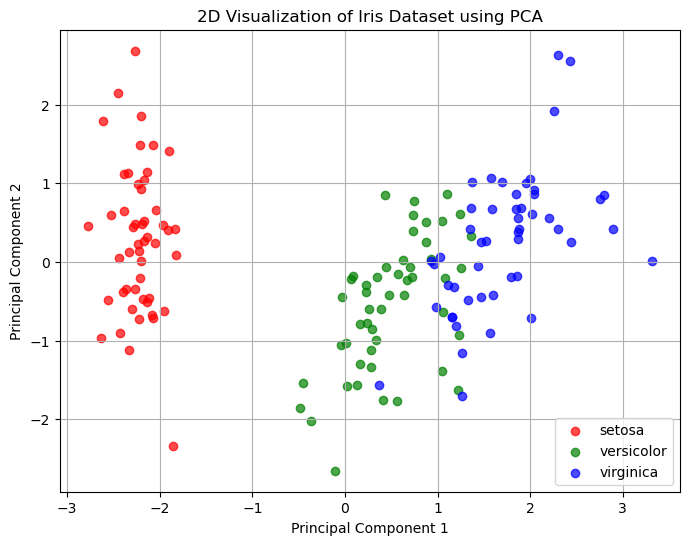

In [4]:
# Step 4: Scatter plot of 2D PCA-transformed data
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for i, target in enumerate(np.unique(y)):
    plt.scatter(X_pca[y==target, 0], X_pca[y==target, 1], 
                color=colors[i], label=target_names[i], alpha=0.7)

plt.xlabel("Principal Component 1")

plt.ylabel("Principal Component 2")

plt.title("2D Visualization of Iris Dataset using PCA")

plt.legend()
plt.grid(True)
plt.show()

### Observation 

The first two principal components together explain ~96% of the total variance, 

which means we successfully reduced from 4 features to 2 without losing much information.

In the scatter plot, we see that Setosa is clearly separated from the other two species. 

Versicolor and Virginica overlap slightly, but still show separation trends.

This demonstrates how PCA helps us visualize and understand high-dimensional data in a simpler, lower-dimensional form.